In [32]:
import openai
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import re
import time
import pickle
import copy
import json
import requests
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
filepath='./'
plotpath='./'
assert os.path.exists(filepath)
pd.set_option('display.max_columns', None)

In [33]:
col_order=['Human',
'gpt-4o',
'gpt-4',
'gpt-3.5',
'deepseek-v2.5',
# 'bard',
'text-bison-001',
'text-davinci-003',
'text-davinci-002',
'claude-instant',
'qwen-72b', 
'qwen-32b', 
'openchat-13b',
'wizardlm-13b',
'vicuna-13b',
'llama2-13b',
'oasst-12b',
'qwen-7b',
'vicuna-7b',
'llama2-7b',
'chatglm2-6b',
]

In [34]:
df=pd.read_excel(os.path.join(filepath,'game_results.xlsx'))
df['Game'].fillna(method='ffill', inplace=True)

print(df.shape)
df.head()

(34, 27)


,Game,ver,Metric,gpt-4,gpt-3.5,text-bison-001,text-davinci-003,text-davinci-002,claude-instant,openchat-13b,wizardlm-13b,vicuna-13b,llama2-13b,oasst-12b,vicuna-7b,llama2-7b,chatglm2-6b,qwen-7b,qwen-32b,qwen-72b,gpt-4o,deepseek-v2.5,Human,Max_score,Min_score,Reverse,Show
0,SecPriAuc,v1,ActDev↓,0.383,0.115,0.000,0.100,0.200,0.200,0.010,0.100,0.200,0.100,0.000,0.100,0.300,0.050,NaN,NaN,NaN,NaN,NaN,-,NaN,0,1,0
1,SecPriAuc,fin,ActDev↓,0.269,0.366,0.000,0.073,0.128,0.173,0.000,0.010,0.066,0.217,0.362,0.713,0.628,0.445,0.198,0.063,0.000,0.201,0.292,NaN,1.0,0,1,1
2,BeaCon,v1,ActDev↓,20.440,8.440,50.000,67.000,66.000,50.000,66.000,66.700,67.000,50.000,50.000,50.000,35.000,60.000,NaN,NaN,NaN,NaN,NaN,-,NaN,0,1,0
3,BeaCon,fin,ActDev↓,0.237,0.441,0.500,0.696,0.552,0.505,0.660,0.527,0.618,0.505,0.587,0.604,0.502,0.693,0.248,0.222,0.258,0.257,0.186,0.2865,1.0,0,1,1
4,OnePD,v1,Dev↓,0.544,0.106,0.061,0.061,0.182,0.046,0.394,0.046,0.176,0.394,0.590,0.000,0.557,0.000,NaN,NaN,NaN,NaN,NaN,-,NaN,0,1,0


# individual

In [57]:
selected_games=['SecPriAuc','BeaCon','OnePD','FinRepPD','OnePG','FinRepPG']
# selected_vers=['fin']

df1=df[df.apply(lambda x:x['Game'] in selected_games and x['Show']==1,axis=1)]
df1

,Game,ver,Metric,gpt-4,gpt-3.5,text-bison-001,text-davinci-003,text-davinci-002,claude-instant,openchat-13b,wizardlm-13b,vicuna-13b,llama2-13b,oasst-12b,vicuna-7b,llama2-7b,chatglm2-6b,qwen-7b,qwen-32b,qwen-72b,gpt-4o,deepseek-v2.5,Human,Max_score,Min_score,Reverse,Show
1,SecPriAuc,fin,ActDev↓,0.2690,0.366,0.0000,0.0730,0.128,0.173,0.0000,0.0100,0.0660,0.217,0.3620,0.7130,0.6280,0.4450,0.198,0.063,0.0000,0.2010,0.2920,NaN,1.0,0,1,1
3,BeaCon,fin,ActDev↓,0.2370,0.441,0.5000,0.6960,0.552,0.505,0.6600,0.5270,0.6180,0.505,0.5870,0.6040,0.5020,0.6930,0.248,0.222,0.2580,0.2570,0.1860,0.2865,1.0,0,1,1
9,OnePD,NaN,%NE,0.5150,0.495,0.8400,0.5850,0.610,0.905,0.4750,0.6600,0.4750,0.380,0.6400,0.5150,0.6100,0.5000,0.630,0.680,0.6000,0.5650,0.8400,0.79,1.0,0,0,1
15,FinRepPD,NaN,%NE,0.5065,0.555,0.4825,0.4975,0.400,0.495,0.5175,0.5125,0.5375,0.555,0.4975,0.4875,0.5175,0.5125,0.640,0.610,0.5275,0.5475,0.8675,0.643,1.0,0,0,1
17,OnePG,NaN,%NE,0.4960,0.578,1.0000,0.4000,0.800,0.800,0.8000,0.8000,0.6000,0.400,0.7000,0.7000,0.6000,0.3000,0.578,0.684,0.6010,0.6250,0.6520,0.583,1.0,0,0,1
19,FinRepPG,NaN,%NE,0.5840,0.495,0.8500,0.3380,0.600,0.810,0.7000,0.6100,0.4400,0.260,0.8500,0.1600,0.3840,0.0000,0.437,0.609,0.4750,0.7640,0.5310,0.8714,1.0,0,0,1


In [58]:
df1['name']=df1['Game']
reverse_names=df1[df1['Reverse']==1].loc[:,'name']

dfplot=df1.drop(columns=['Game','ver','Metric','Reverse'])

dfplot.set_index('name', inplace=True)
dfplot=dfplot.astype(float)

def normalize_row(row):
    m= row.loc['Min_score']
    M = row.loc['Max_score']
    norm=(row-m) / (M-m)
    return norm

dfplot = dfplot.apply(normalize_row, axis=1)
dfplot=dfplot.drop(columns=['Max_score','Min_score']) ###############
# dfplot = dfplot.apply(normalize_row, axis=1)

# reverse
dfplot.loc[reverse_names]=1-dfplot.loc[reverse_names]

dfplot=dfplot[col_order]

average_row = dfplot.mean().round(2)
dfplot.loc['Overall',:] = average_row

dfplot_1 = dfplot.copy()

C:\Users\dell\AppData\Local\Temp\ipykernel_38492\627293640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name']=df1['Game']


In [37]:
dfplot

,Human,gpt-4o,gpt-4,gpt-3.5,deepseek-v2.5,text-bison-001,text-davinci-003,text-davinci-002,claude-instant,qwen-72b,qwen-32b,openchat-13b,wizardlm-13b,vicuna-13b,llama2-13b,oasst-12b,qwen-7b,vicuna-7b,llama2-7b,chatglm2-6b
name,,,,,,,,,,,,,,,,,,,,
SecPriAuc,NaN,0.7990,0.7310,0.634,0.7080,1.0000,0.9270,0.872,0.827,1.0000,0.937,1.0000,0.9900,0.9340,0.783,0.6380,0.802,0.2870,0.3720,0.5550
BeaCon,0.7135,0.7430,0.7630,0.559,0.8140,0.5000,0.3040,0.448,0.495,0.7420,0.778,0.3400,0.4730,0.3820,0.495,0.4130,0.752,0.3960,0.4980,0.3070
OnePD,0.7900,0.5650,0.5150,0.495,0.8400,0.8400,0.5850,0.610,0.905,0.6000,0.680,0.4750,0.6600,0.4750,0.380,0.6400,0.630,0.5150,0.6100,0.5000
FinRepPD,0.6430,0.5475,0.5065,0.555,0.8675,0.4825,0.4975,0.400,0.495,0.5275,0.610,0.5175,0.5125,0.5375,0.555,0.4975,0.640,0.4875,0.5175,0.5125
OnePG,0.5830,0.6250,0.4960,0.578,0.6520,1.0000,0.4000,0.800,0.800,0.6010,0.684,0.8000,0.8000,0.6000,0.400,0.7000,0.578,0.7000,0.6000,0.3000
FinRepPG,0.8714,0.7640,0.5840,0.495,0.5310,0.8500,0.3380,0.600,0.810,0.4750,0.609,0.7000,0.6100,0.4400,0.260,0.8500,0.437,0.1600,0.3840,0.0000
Overall,0.7200,0.6700,0.6000,0.550,0.7400,0.7800,0.5100,0.620,0.720,0.6600,0.720,0.6400,0.6700,0.5600,0.480,0.6200,0.640,0.4200,0.5000,0.3600


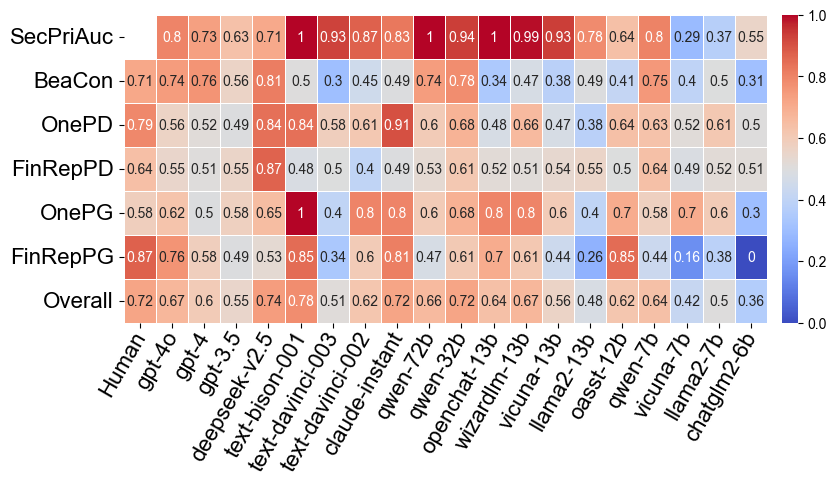

In [59]:
plt.figure(figsize=(10, 4))
sns.heatmap(dfplot, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, annot_kws={"size": 10},cbar_kws={"pad": 0.02})

# # 添加红色边框在第一列
# for _, j in enumerate(range(len(dfplot.columns))):
#     if j == 0:  # 检查是否是1st列
#         plt.gca().add_patch(plt.Rectangle((j, 0), 1, len(dfplot.index), fill=False, edgecolor='red', lw=3))
# # 将第一列的x轴刻度标签设置为红色
# xticks_labels = plt.gca().get_xticklabels()
# if xticks_labels:
#     xticks_labels[0].set_color('red')
plt.xticks(rotation=60, ha='right', fontsize=16)
plt.tick_params(axis='x', pad=0)  # 调整tick的距离
plt.yticks(fontsize=16)

ax = plt.gca()
import matplotlib.transforms as mtrans
trans = mtrans.Affine2D().translate(10, 0)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
    
plt.ylabel('')
plt.xlabel('')
plt.savefig(os.path.join(plotpath, 'game_orig.pdf'), bbox_inches='tight')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_38492\3107564548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name']=df1['Game']


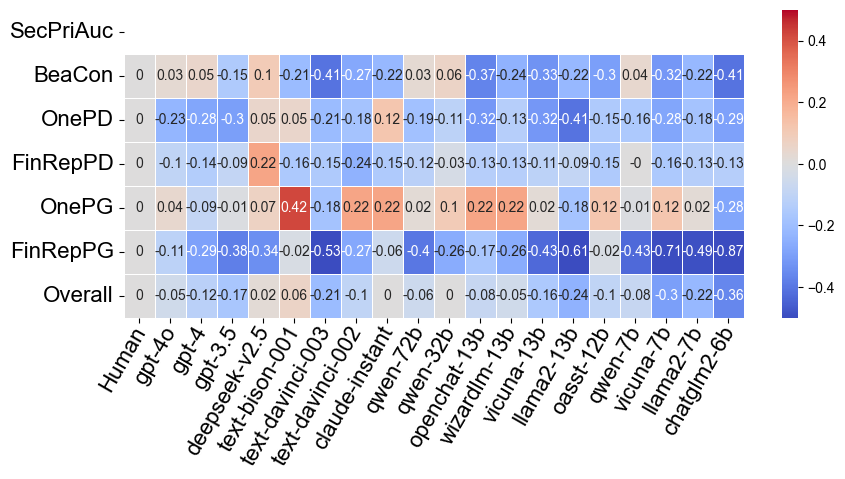

In [60]:
df1['name']=df1['Game']
reverse_names=df1[df1['Reverse']==1].loc[:,'name']

dfplot=df1.drop(columns=['Game','ver','Metric','Reverse'])

dfplot.set_index('name', inplace=True)
dfplot=dfplot.astype(float)

def normalize_row(row):
    m= row.loc['Min_score']
    M = row.loc['Max_score']
    norm=(row-m) / (M-m)
    return norm

dfplot = dfplot.apply(normalize_row, axis=1)
dfplot=dfplot.drop(columns=['Max_score','Min_score']) ###############
# dfplot = dfplot.apply(normalize_row, axis=1)

# reverse
dfplot.loc[reverse_names]=1-dfplot.loc[reverse_names]

dfplot=dfplot[col_order]

average_row = dfplot.mean().round(2)
dfplot.loc['Overall',:] = average_row
dfplot = dfplot.apply(lambda x:x-x['Human'], axis=1).round(2)

dfplot_2 = dfplot.copy()

plt.figure(figsize=(10, 4))
sns.heatmap(dfplot, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.5, vmax=0.5)

plt.xticks(rotation=60, ha='right', fontsize=16)
plt.tick_params(axis='x', pad=0)  # 调整tick的距离
plt.yticks(fontsize=16)

ax = plt.gca()
import matplotlib.transforms as mtrans
trans = mtrans.Affine2D().translate(10, 0)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
    
plt.ylabel('')
plt.xlabel('')
plt.savefig(os.path.join(plotpath, 'game_norm.pdf'), bbox_inches='tight')
plt.show()



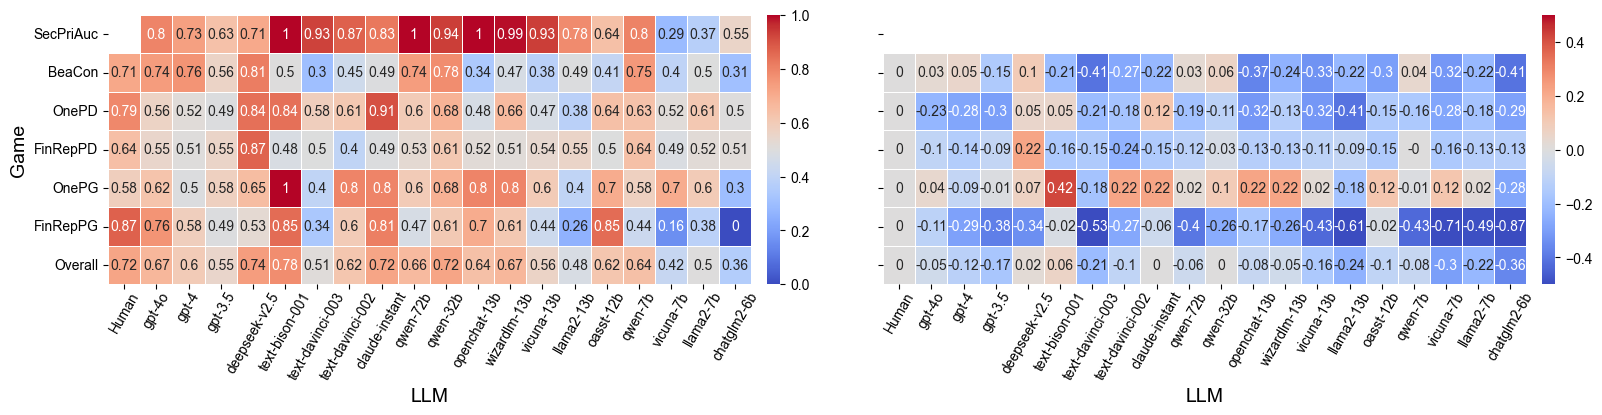

In [17]:

# 设置全局字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# 创建一个1行2列的子图布局，并共享y轴
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3.5), sharey=True)

# # 在第一个子图上绘制dfplot的热力图
sns.heatmap(dfplot_1, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, 
            annot_kws={"size": 10}, ax=ax1, cbar_kws={"pad": 0.02})
# # 添加红色边框在第一列
# for _, j in enumerate(range(len(dfplot_1.columns))):
#     if j == 0:
#         ax1.add_patch(plt.Rectangle((j, 0), 1, len(dfplot_1.index), fill=False, edgecolor='red', lw=3))
# # 将第一列的x轴刻度标签设置为红色
# xticks_labels = ax1.get_xticklabels()
# if xticks_labels:
#     xticks_labels[0].set_color('red')

# 设置x轴刻度标签并倾斜
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='center')
ax1.tick_params(axis='x', which='major', pad=0)
cbar_ax1 = ax1.collections[0].colorbar
cbar_ax1.ax.set_position([ax1.get_position().x1 + 1, ax1.get_position().y0, 0.92, ax1.get_position().height])

# 在第二个子图上绘制dfplot1的热力图
sns.heatmap(dfplot_2, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.5, vmax=0.5, 
            annot_kws={"size": 10}, ax=ax2, cbar_kws={"pad": 0.02})
# 设置x轴刻度标签并倾斜
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='center')
ax2.tick_params(axis='x', which='major', pad=0)

# 设置标题和轴标签
# fig.suptitle('Game theory', y=1, fontsize=16)  # 调整标题的位置
ax1.set_ylabel('Game', fontsize=14)
ax1.set_xlabel('LLM', fontsize=14)
ax2.set_xlabel('LLM', fontsize=14)
ax2.set_ylabel('')  # 移除右图的y轴标签

plt.subplots_adjust(wspace=-0.0)  # 减少子图之间的间距
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # 调整布局以适应标题
plt.savefig(os.path.join(plotpath, 'game.pdf'), bbox_inches='tight')
plt.show()


# social game

In [61]:
selected_games=['InfRepPD','FinRepSH','FinRepBoS','FinRepME']
selected_vers=['fin']

# df1=df[df.apply(lambda x:x['Game'] in selected_games and x['ver'] in selected_vers,axis=1)]
df1=df[df.apply(lambda x:x['Game'] in selected_games and x['Show']==1,axis=1)]
# df1=df1.loc[selected_games]
df1

,Game,ver,Metric,gpt-4,gpt-3.5,text-bison-001,text-davinci-003,text-davinci-002,claude-instant,openchat-13b,wizardlm-13b,vicuna-13b,llama2-13b,oasst-12b,vicuna-7b,llama2-7b,chatglm2-6b,qwen-7b,qwen-32b,qwen-72b,gpt-4o,deepseek-v2.5,Human,Max_score,Min_score,Reverse,Show
22,InfRepPD,fin,Eff↑,0.6260,0.514,0.4515,0.4810,0.4190,0.4005,0.3365,0.3960,0.541,0.4015,0.4220,0.4445,0.356,0.5000,0.488,0.2395,0.613,0.5545,0.1365,0.294,1.0,0,0,1
25,FinRepBoS,fin,Eff↑,0.5200,0.625,0.5850,0.5350,0.5850,0.5450,0.5400,0.6800,0.565,0.5700,0.5050,0.6600,0.470,0.8200,0.605,0.4750,0.590,0.7150,0.6700,0.805,1.0,0,0,1
28,FinRepSH,fin,Eff↑,0.7705,0.251,0.3360,0.3455,0.4725,0.3760,0.3685,0.3765,0.338,0.3155,0.3075,0.3240,0.315,0.4455,0.408,0.2535,0.794,0.5565,0.1665,0.5,1.0,0,0,1
29,FinRepME,fin,Eff↑,0.6830,0.497,1.0000,0.9150,0.5710,0.8020,0.9380,0.8020,0.938,0.9270,0.6350,0.9480,0.860,0.8330,0.592,0.6330,0.740,0.6600,0.5350,0.286,1.0,0,0,1


In [62]:
df1['name']=df1['Game']
reverse_names=df1[df1['Reverse']==1].loc[:,'name']

dfplot=df1.drop(columns=['Game','ver','Metric','Reverse'])

dfplot.set_index('name', inplace=True)
dfplot=dfplot.astype(float)

def normalize_row(row):
    m= row.loc['Min_score']
    M = row.loc['Max_score']
#     M=row.max()
#     m,M=row.min(),row.max()
    norm=(row-m) / (M-m)
    return norm

dfplot = dfplot.apply(normalize_row, axis=1)
dfplot=dfplot.drop(columns=['Max_score','Min_score'])
dfplot.loc[reverse_names]=1-dfplot.loc[reverse_names]

dfplot=dfplot[col_order]

average_row = dfplot.mean().round(2)
dfplot.loc['Overall',:] = average_row

dfplot_1 = dfplot.copy()

C:\Users\dell\AppData\Local\Temp\ipykernel_38492\1952034051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name']=df1['Game']


In [20]:
dfplot

,Human,gpt-4o,gpt-4,gpt-3.5,deepseek-v2.5,text-bison-001,text-davinci-003,text-davinci-002,claude-instant,qwen-72b,qwen-32b,openchat-13b,wizardlm-13b,vicuna-13b,llama2-13b,oasst-12b,qwen-7b,vicuna-7b,llama2-7b,chatglm2-6b
name,,,,,,,,,,,,,,,,,,,,
InfRepPD,0.294,0.5545,0.6260,0.514,0.1365,0.4515,0.4810,0.4190,0.4005,0.613,0.2395,0.3365,0.3960,0.541,0.4015,0.4220,0.488,0.4445,0.356,0.5000
FinRepBoS,0.805,0.7150,0.5200,0.625,0.6700,0.5850,0.5350,0.5850,0.5450,0.590,0.4750,0.5400,0.6800,0.565,0.5700,0.5050,0.605,0.6600,0.470,0.8200
FinRepSH,0.500,0.5565,0.7705,0.251,0.1665,0.3360,0.3455,0.4725,0.3760,0.794,0.2535,0.3685,0.3765,0.338,0.3155,0.3075,0.408,0.3240,0.315,0.4455
FinRepME,0.286,0.6600,0.6830,0.497,0.5350,1.0000,0.9150,0.5710,0.8020,0.740,0.6330,0.9380,0.8020,0.938,0.9270,0.6350,0.592,0.9480,0.860,0.8330
Overall,0.470,0.6200,0.6500,0.470,0.3800,0.5900,0.5700,0.5100,0.5300,0.680,0.4000,0.5500,0.5600,0.600,0.5500,0.4700,0.520,0.5900,0.500,0.6500


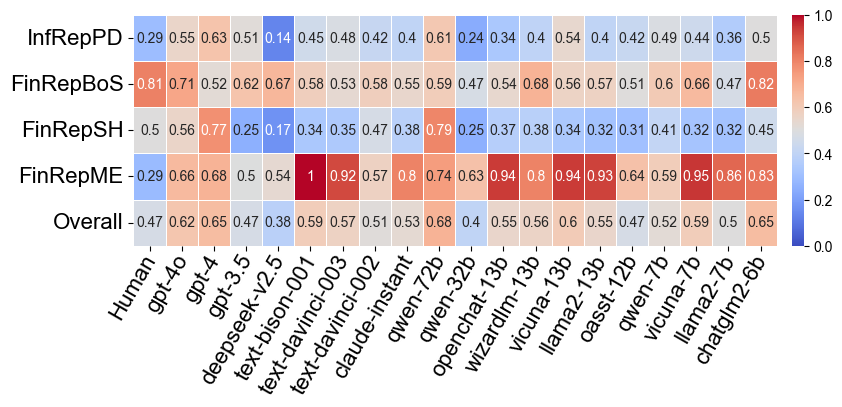

In [63]:
plt.figure(figsize=(10, 3))
sns.heatmap(dfplot, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, annot_kws={"size": 10},cbar_kws={"pad": 0.02})

# # 添加红色边框在第一列
# for _, j in enumerate(range(len(dfplot.columns))):
#     if j == 0:  # 检查是否是1st列
#         plt.gca().add_patch(plt.Rectangle((j, 0), 1, len(dfplot.index), fill=False, edgecolor='red', lw=3))
# # 将第一列的x轴刻度标签设置为红色
# xticks_labels = plt.gca().get_xticklabels()
# if xticks_labels:
#     xticks_labels[0].set_color('red')
plt.xticks(rotation=60, ha='right', fontsize=16)
plt.tick_params(axis='x', pad=0)  # 调整tick的距离
plt.yticks(fontsize=16)

ax = plt.gca()
import matplotlib.transforms as mtrans
trans = mtrans.Affine2D().translate(10, 0)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
    
plt.ylabel('')
plt.xlabel('')
plt.savefig(os.path.join(plotpath, 'coop_orig.pdf'), bbox_inches='tight')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_38492\2677187721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name']=df1['Game']


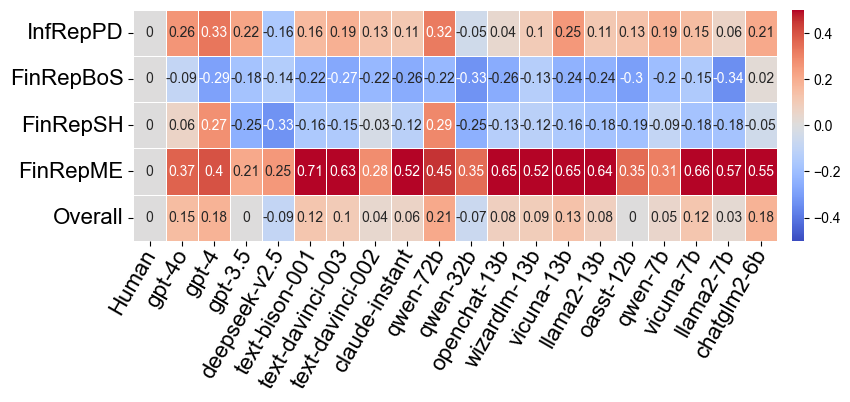

In [64]:
df1['name']=df1['Game']
reverse_names=df1[df1['Reverse']==1].loc[:,'name']

dfplot=df1.drop(columns=['Game','ver','Metric','Reverse'])

dfplot.set_index('name', inplace=True)
dfplot=dfplot.astype(float)

def normalize_row(row):
    m= row.loc['Min_score']
    M = row.loc['Max_score']
#     M=row.max()
#     m,M=row.min(),row.max()
    norm=(row-m) / (M-m)
    return norm

dfplot = dfplot.apply(normalize_row, axis=1)
dfplot=dfplot.drop(columns=['Max_score','Min_score'])
dfplot.loc[reverse_names]=1-dfplot.loc[reverse_names]

dfplot=dfplot[col_order]

average_row = dfplot.mean().round(2)
dfplot.loc['Overall',:] = average_row
dfplot = dfplot.apply(lambda x:x-x['Human'], axis=1).round(2)

dfplot_2 = dfplot.copy()

plt.figure(figsize=(10, 3))
sns.heatmap(dfplot, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.5, vmax=0.5, annot_kws={"size": 10},cbar_kws={"pad": 0.02})
plt.xticks(rotation=60, ha='right', fontsize=16)
plt.tick_params(axis='x', pad=0)  # 调整tick的距离
plt.yticks(fontsize=16)

ax = plt.gca()
import matplotlib.transforms as mtrans
trans = mtrans.Affine2D().translate(10, 0)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
    
plt.ylabel('')
plt.xlabel('')
plt.savefig(os.path.join(plotpath, 'coop_norm.pdf'), bbox_inches='tight')
plt.show()

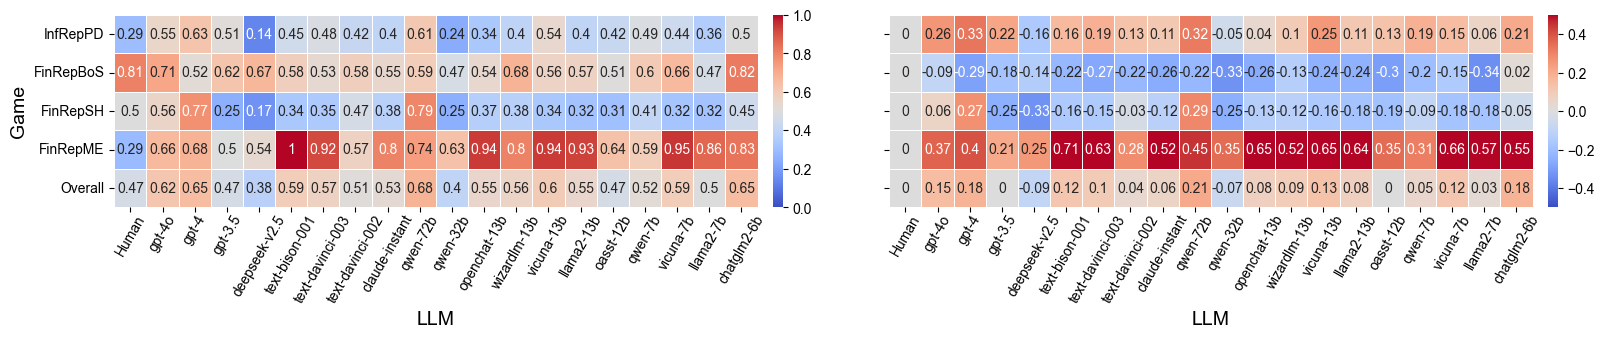

In [23]:

# 设置全局字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# 创建一个1行2列的子图布局，并共享y轴
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2.5), sharey=True)

# # 在第一个子图上绘制dfplot的热力图
sns.heatmap(dfplot_1, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, 
            annot_kws={"size": 10}, ax=ax1, cbar_kws={"pad": 0.02})
# # 添加红色边框在第一列
# for _, j in enumerate(range(len(dfplot_1.columns))):
#     if j == 0:
#         ax1.add_patch(plt.Rectangle((j, 0), 1, len(dfplot_1.index), fill=False, edgecolor='red', lw=3))
# # 将第一列的x轴刻度标签设置为红色
# xticks_labels = ax1.get_xticklabels()
# if xticks_labels:
#     xticks_labels[0].set_color('red')

# 设置x轴刻度标签并倾斜
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='center')
ax1.tick_params(axis='x', which='major', pad=0)
cbar_ax1 = ax1.collections[0].colorbar
cbar_ax1.ax.set_position([ax1.get_position().x1 + 1, ax1.get_position().y0, 0.92, ax1.get_position().height])

# 在第二个子图上绘制dfplot1的热力图
sns.heatmap(dfplot_2, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.5, vmax=0.5, 
            annot_kws={"size": 10}, ax=ax2, cbar_kws={"pad": 0.02})
# 设置x轴刻度标签并倾斜
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='center')
ax2.tick_params(axis='x', which='major', pad=0)

# 设置标题和轴标签
# fig.suptitle('Cooperation and Coordination', y=1, fontsize=16)  # 调整标题的位置
ax1.set_ylabel('Game', fontsize=14)
ax1.set_xlabel('LLM', fontsize=14)
ax2.set_xlabel('LLM', fontsize=14)
ax2.set_ylabel('')  # 移除右图的y轴标签

plt.subplots_adjust(wspace=-0.0)  # 减少子图之间的间距
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # 调整布局以适应标题
plt.savefig(os.path.join(plotpath, 'coop.pdf'), bbox_inches='tight')
plt.show()


# Wisdom of crowds

In [65]:
selected_games=['MMLU','MATH']
selected_vers=['fin']

# df1=df[df.apply(lambda x:x['Game'] in selected_games and x['ver'] in selected_vers,axis=1)]
df1=df[df.apply(lambda x:x['Game'] in selected_games and x['Show']==1,axis=1)]
# df1=df1.loc[selected_games]
df1

,Game,ver,Metric,gpt-4,gpt-3.5,text-bison-001,text-davinci-003,text-davinci-002,claude-instant,openchat-13b,wizardlm-13b,vicuna-13b,llama2-13b,oasst-12b,vicuna-7b,llama2-7b,chatglm2-6b,qwen-7b,qwen-32b,qwen-72b,gpt-4o,deepseek-v2.5,Human,Max_score,Min_score,Reverse,Show
31,MMLU,Discuss,Accuracy,0.900,0.733,0.500,0.547,0.433,0.587,0.540,0.413,0.373,0.473,0.187,0.26,0.420,0.400,0.820,0.86,0.833,0.86,0.787,0.345,1.0,0,0,1
33,MATH,Discuss,Accuracy,0.813,0.527,0.127,0.153,0.140,0.347,0.273,0.047,0.067,0.060,0.033,0.06,0.067,0.067,0.907,0.96,0.940,0.88,0.913,0.4,1.0,0,0,1


In [66]:
df1['name']=df1['Game']
reverse_names=df1[df1['Reverse']==1].loc[:,'name']

dfplot=df1.drop(columns=['Game','ver','Metric','Reverse'])

dfplot.set_index('name', inplace=True)
dfplot=dfplot.astype(float)

def normalize_row(row):
    m= row.loc['Min_score']
    M = row.loc['Max_score']
#     M=row.max()
#     m,M=row.min(),row.max()
    norm=(row-m) / (M-m)
    return norm

dfplot = dfplot.apply(normalize_row, axis=1)
dfplot=dfplot.drop(columns=['Max_score','Min_score'])
dfplot.loc[reverse_names]=1-dfplot.loc[reverse_names]

dfplot=dfplot[col_order]

average_row = dfplot.mean().round(2)
dfplot.loc['Overall',:] = average_row

dfplot_1 = dfplot.copy()

C:\Users\dell\AppData\Local\Temp\ipykernel_38492\1952034051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name']=df1['Game']


In [53]:
dfplot

,Human,gpt-4o,gpt-4,gpt-3.5,deepseek-v2.5,text-bison-001,text-davinci-003,text-davinci-002,claude-instant,qwen-72b,qwen-32b,openchat-13b,wizardlm-13b,vicuna-13b,llama2-13b,oasst-12b,qwen-7b,vicuna-7b,llama2-7b,chatglm2-6b
name,,,,,,,,,,,,,,,,,,,,
MMLU,0.345,0.86,0.900,0.733,0.787,0.500,0.547,0.433,0.587,0.833,0.86,0.540,0.413,0.373,0.473,0.187,0.820,0.26,0.420,0.400
MATH,0.400,0.88,0.813,0.527,0.913,0.127,0.153,0.140,0.347,0.940,0.96,0.273,0.047,0.067,0.060,0.033,0.907,0.06,0.067,0.067
Overall,0.370,0.87,0.860,0.630,0.850,0.310,0.350,0.290,0.470,0.890,0.91,0.410,0.230,0.220,0.270,0.110,0.860,0.16,0.240,0.230


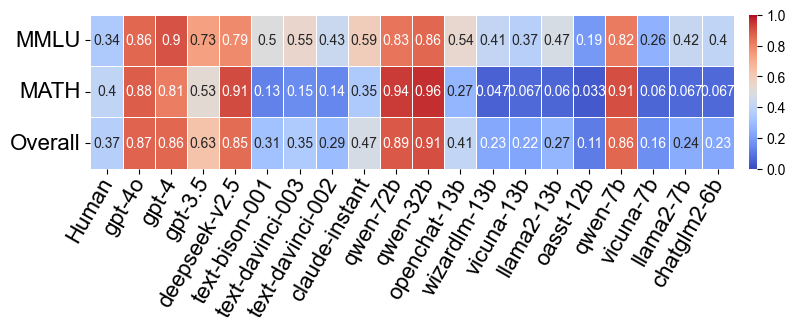

In [68]:
plt.figure(figsize=(10, 2))
sns.heatmap(dfplot, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, annot_kws={"size": 10},cbar_kws={"pad": 0.02})

# # 添加红色边框在第一列
# for _, j in enumerate(range(len(dfplot.columns))):
#     if j == 0:  # 检查是否是1st列
#         plt.gca().add_patch(plt.Rectangle((j, 0), 1, len(dfplot.index), fill=False, edgecolor='red', lw=3))
# # 将第一列的x轴刻度标签设置为红色
# xticks_labels = plt.gca().get_xticklabels()
# if xticks_labels:
#     xticks_labels[0].set_color('red')
    
plt.xticks(rotation=60, ha='right', fontsize=16)
plt.tick_params(axis='x', pad=0)  # 调整tick的距离
plt.yticks(rotation=0, fontsize=16)

ax = plt.gca()
import matplotlib.transforms as mtrans
trans = mtrans.Affine2D().translate(10, 0)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
    
plt.ylabel('')
plt.xlabel('')
plt.savefig(os.path.join(plotpath, 'wisd_orig.pdf'), bbox_inches='tight')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_38492\3618477278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name']=df1['Game']


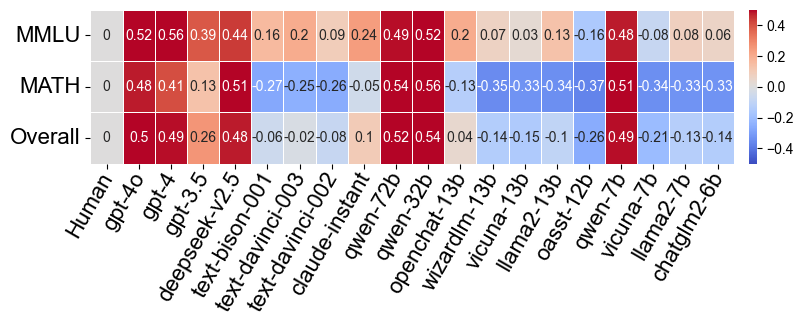

In [69]:
df1['name']=df1['Game']
reverse_names=df1[df1['Reverse']==1].loc[:,'name']

dfplot=df1.drop(columns=['Game','ver','Metric','Reverse'])

dfplot.set_index('name', inplace=True)
dfplot=dfplot.astype(float)

def normalize_row(row):
    m= row.loc['Min_score']
    M = row.loc['Max_score']
#     M=row.max()
#     m,M=row.min(),row.max()
    norm=(row-m) / (M-m)
    return norm

dfplot = dfplot.apply(normalize_row, axis=1)
dfplot=dfplot.drop(columns=['Max_score','Min_score'])
dfplot.loc[reverse_names]=1-dfplot.loc[reverse_names]

dfplot=dfplot[col_order]

average_row = dfplot.mean().round(2)
dfplot.loc['Overall',:] = average_row
dfplot = dfplot.apply(lambda x:x-x['Human'], axis=1).round(2)

dfplot_2 = dfplot.copy()

plt.figure(figsize=(10, 2))
sns.heatmap(dfplot, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.5, vmax=0.5, annot_kws={"size": 10},cbar_kws={"pad": 0.02})
    
plt.xticks(rotation=60, ha='right', fontsize=16)
plt.tick_params(axis='x', pad=0)  # 调整tick的距离
plt.yticks(rotation=0, fontsize=16)

ax = plt.gca()
import matplotlib.transforms as mtrans
trans = mtrans.Affine2D().translate(10, 0)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
    
plt.ylabel('')
plt.xlabel('')
plt.savefig(os.path.join(plotpath, 'wisd_norm.pdf'), bbox_inches='tight')
plt.show()

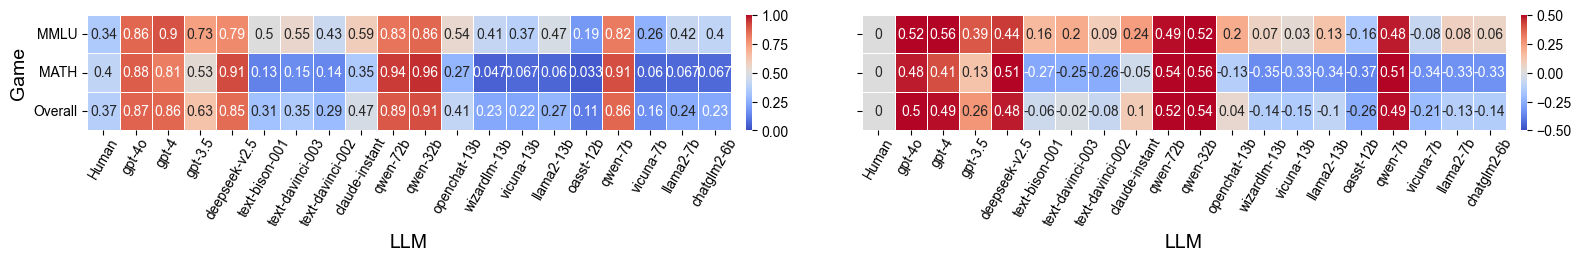

In [56]:

# 设置全局字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# 创建一个1行2列的子图布局，并共享y轴
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 1.5), sharey=True)

# # 在第一个子图上绘制dfplot的热力图
sns.heatmap(dfplot_1, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, 
            annot_kws={"size": 10}, ax=ax1, cbar_kws={"pad": 0.02})
# # 添加红色边框在第一列
# for _, j in enumerate(range(len(dfplot_1.columns))):
#     if j == 0:
#         ax1.add_patch(plt.Rectangle((j, 0), 1, len(dfplot_1.index), fill=False, edgecolor='red', lw=3))
# # 将第一列的x轴刻度标签设置为红色
# xticks_labels = ax1.get_xticklabels()
# if xticks_labels:
#     xticks_labels[0].set_color('red')

# 设置x轴刻度标签并倾斜
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='center')
ax1.tick_params(axis='x', which='major', pad=0)
cbar_ax1 = ax1.collections[0].colorbar
cbar_ax1.ax.set_position([ax1.get_position().x1 + 1, ax1.get_position().y0, 0.92, ax1.get_position().height])

# 在第二个子图上绘制dfplot1的热力图
sns.heatmap(dfplot_2, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.5, vmax=0.5, 
            annot_kws={"size": 10}, ax=ax2, cbar_kws={"pad": 0.02})
# 设置x轴刻度标签并倾斜
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='center')
ax2.tick_params(axis='x', which='major', pad=0)

# 设置标题和轴标签
# fig.suptitle('Wisdom of crowds', y=1.1, fontsize=16)  # 调整标题的位置
ax1.set_ylabel('Game', fontsize=14)
ax1.set_xlabel('LLM', fontsize=14)
ax2.set_xlabel('LLM', fontsize=14)
ax2.set_ylabel('')  # 移除右图的y轴标签

plt.subplots_adjust(wspace=-0.0)  # 减少子图之间的间距
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # 调整布局以适应标题
plt.savefig(os.path.join(plotpath, 'wisd.pdf'), bbox_inches='tight')
plt.show()


# society overall

In [30]:
selected_games=['InfRepPD','FinRepSH','FinRepBoS','FinRepME']
selected_vers=['fin']

selected_games.extend(['MMLU','MATH'])
selected_vers.extend(['fin'])

# df1=df[df.apply(lambda x:x['Game'] in selected_games and x['ver'] in selected_vers,axis=1)]
df1=df[df.apply(lambda x:x['Game'] in selected_games and x['Show']==1,axis=1)]
# df1=df1.loc[selected_games]
df1

,Game,ver,Metric,gpt-4,gpt-3.5,text-bison-001,text-davinci-003,text-davinci-002,claude-instant,openchat-13b,wizardlm-13b,vicuna-13b,llama2-13b,oasst-12b,vicuna-7b,llama2-7b,chatglm2-6b,qwen-7b,qwen-32b,qwen-72b,gpt-4o,deepseek-v2.5,Human,Max_score,Min_score,Reverse,Show
22,InfRepPD,fin,Eff↑,0.6260,0.514,0.4515,0.4810,0.4190,0.4005,0.3365,0.3960,0.541,0.4015,0.4220,0.4445,0.356,0.5000,0.488,0.2395,0.613,0.5545,0.1365,0.294,1.0,0,0,1
25,FinRepBoS,fin,Eff↑,0.5200,0.625,0.5850,0.5350,0.5850,0.5450,0.5400,0.6800,0.565,0.5700,0.5050,0.6600,0.470,0.8200,0.605,0.4750,0.590,0.7150,0.6700,0.805,1.0,0,0,1
28,FinRepSH,fin,Eff↑,0.7705,0.251,0.3360,0.3455,0.4725,0.3760,0.3685,0.3765,0.338,0.3155,0.3075,0.3240,0.315,0.4455,0.408,0.2535,0.794,0.5565,0.1665,0.5,1.0,0,0,1
29,FinRepME,fin,Eff↑,0.6830,0.497,1.0000,0.9150,0.5710,0.8020,0.9380,0.8020,0.938,0.9270,0.6350,0.9480,0.860,0.8330,0.592,0.6330,0.740,0.6600,0.5350,0.286,1.0,0,0,1
31,MMLU,Discuss,Accuracy,0.9000,0.733,0.5000,0.5470,0.4330,0.5870,0.5400,0.4130,0.373,0.4730,0.1870,0.2600,0.420,0.4000,0.820,0.8600,0.833,0.8600,0.7870,0.345,1.0,0,0,1
33,MATH,Discuss,Accuracy,0.8130,0.527,0.1270,0.1530,0.1400,0.3470,0.2730,0.0470,0.067,0.0600,0.0330,0.0600,0.067,0.0670,0.907,0.9600,0.940,0.8800,0.9130,0.4,1.0,0,0,1


In [31]:
df1['name']=df1['Game']
reverse_names=df1[df1['Reverse']==1].loc[:,'name']

dfplot=df1.drop(columns=['Game','ver','Metric','Reverse'])

dfplot.set_index('name', inplace=True)
dfplot = dfplot.replace('-', np.nan)
dfplot=dfplot.astype(float)

def normalize_row(row):
    m= row.loc['Min_score']
    M = row.loc['Max_score']
#     M=row.max()
#     m,M=row.min(),row.max()
    norm=(row-m) / (M-m)
    return norm

dfplot = dfplot.apply(normalize_row, axis=1)
dfplot=dfplot.drop(columns=['Max_score','Min_score'])
dfplot.loc[reverse_names]=1-dfplot.loc[reverse_names]

dfplot=dfplot[col_order]

average_row = dfplot.mean().round(2)
dfplot.loc['Overall',:] = average_row

dfplot

C:\Users\dell\AppData\Local\Temp\ipykernel_38492\950165276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name']=df1['Game']


,Human,gpt-4o,gpt-4,gpt-3.5,deepseek-v2.5,text-bison-001,text-davinci-003,text-davinci-002,claude-instant,qwen-72b,qwen-32b,openchat-13b,wizardlm-13b,vicuna-13b,llama2-13b,oasst-12b,qwen-7b,vicuna-7b,llama2-7b,chatglm2-6b
name,,,,,,,,,,,,,,,,,,,,
InfRepPD,0.294,0.5545,0.6260,0.514,0.1365,0.4515,0.4810,0.4190,0.4005,0.613,0.2395,0.3365,0.3960,0.541,0.4015,0.4220,0.488,0.4445,0.356,0.5000
FinRepBoS,0.805,0.7150,0.5200,0.625,0.6700,0.5850,0.5350,0.5850,0.5450,0.590,0.4750,0.5400,0.6800,0.565,0.5700,0.5050,0.605,0.6600,0.470,0.8200
FinRepSH,0.500,0.5565,0.7705,0.251,0.1665,0.3360,0.3455,0.4725,0.3760,0.794,0.2535,0.3685,0.3765,0.338,0.3155,0.3075,0.408,0.3240,0.315,0.4455
FinRepME,0.286,0.6600,0.6830,0.497,0.5350,1.0000,0.9150,0.5710,0.8020,0.740,0.6330,0.9380,0.8020,0.938,0.9270,0.6350,0.592,0.9480,0.860,0.8330
MMLU,0.345,0.8600,0.9000,0.733,0.7870,0.5000,0.5470,0.4330,0.5870,0.833,0.8600,0.5400,0.4130,0.373,0.4730,0.1870,0.820,0.2600,0.420,0.4000
MATH,0.400,0.8800,0.8130,0.527,0.9130,0.1270,0.1530,0.1400,0.3470,0.940,0.9600,0.2730,0.0470,0.067,0.0600,0.0330,0.907,0.0600,0.067,0.0670
Overall,0.440,0.7000,0.7200,0.520,0.5300,0.5000,0.5000,0.4400,0.5100,0.750,0.5700,0.5000,0.4500,0.470,0.4600,0.3500,0.640,0.4500,0.410,0.5100


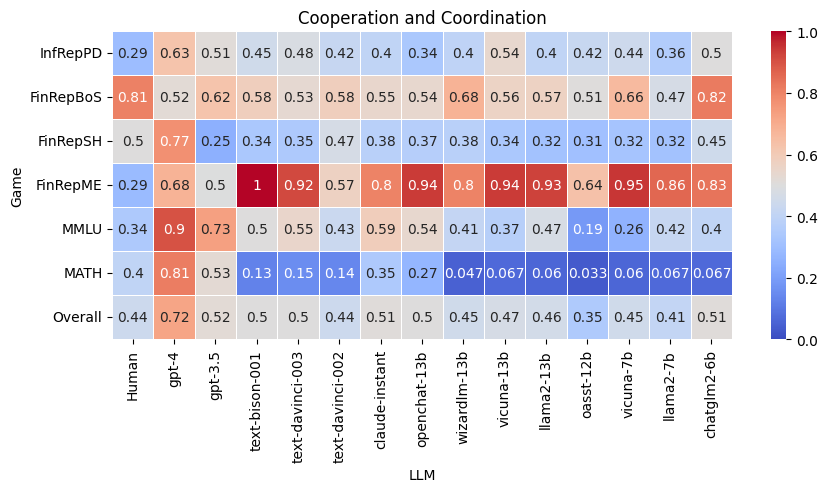

In [58]:
plt.figure(figsize=(10, 4))
sns.heatmap(dfplot, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1)

plt.title('Cooperation and Coordination')
plt.ylabel('Game')
plt.xlabel('LLM')
plt.show()